In [53]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
train = pd.read_csv("./data/train.csv")
train

,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39604,ACCIDENT_39604,2021-12-31 19,금요일,맑음,대구광역시 수성구 수성동3가,교차로 - 교차로안,건조,차대차,측면충돌,신호위반,...,상해없음,이륜,남,28세,경상,0,0,1,0,3
39605,ACCIDENT_39605,2021-12-31 19,금요일,맑음,대구광역시 달서구 상인동,단일로 - 기타,건조,차대차,측면충돌,안전거리미확보,...,상해없음,승용,남,52세,경상,0,0,1,0,3
39606,ACCIDENT_39606,2021-12-31 21,금요일,맑음,대구광역시 달서구 월성동,교차로 - 교차로안,건조,차대차,측면충돌,교차로운행방법위반,...,중상,승용,남,73세,중상,0,2,0,0,10
39607,ACCIDENT_39607,2021-12-31 22,금요일,맑음,대구광역시 달서구 장동,기타 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,여,57세,경상,0,0,1,0,3


In [50]:
# 피하자의 정보에 Na 값이 있는 것을 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39609 entries, 0 to 39608
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39609 non-null  object
 1   사고일시         39609 non-null  object
 2   요일           39609 non-null  object
 3   기상상태         39609 non-null  object
 4   시군구          39609 non-null  object
 5   도로형태         39609 non-null  object
 6   노면상태         39609 non-null  object
 7   사고유형         39609 non-null  object
 8   사고유형 - 세부분류  39609 non-null  object
 9   법규위반         39609 non-null  object
 10  가해운전자 차종     39609 non-null  object
 11  가해운전자 성별     39609 non-null  object
 12  가해운전자 연령     39609 non-null  object
 13  가해운전자 상해정도   39609 non-null  object
 14  피해운전자 차종     38618 non-null  object
 15  피해운전자 성별     38618 non-null  object
 16  피해운전자 연령     38618 non-null  object
 17  피해운전자 상해정도   38618 non-null  object
 18  사망자수         39609 non-null  int64 
 19  중상자수         39609 non-nu

# EDA

### 1. 데이터 구성 변경

In [51]:
# ID 삭제
train = train.drop(["ID"], axis = 1)

# Hour 변수 추가
train["Hour"] = [i.split()[1] for i in train.사고일시]
train["사고일시"] = [i.split()[0] for i in train.사고일시]

# Year, Month, Day 변수 추가
train["Year"] = [i.split("-")[0] for i in train.사고일시]
train["Month"] = [i.split("-")[1] for i in train.사고일시]
train["Day"] = [i.split("-")[2] for i in train.사고일시]
train = train.drop(["사고일시"], axis = 1)

In [57]:
train.groupby("Year").sum()

,사망자수,중상자수,경상자수,부상자수,ECLO
Year,,,,,
2019,112,4190,15454,1954,70386
2020,112,3225,14032,1717,61058
2021,84,2977,12899,1354,55776


<AxesSubplot:xlabel='Year'>

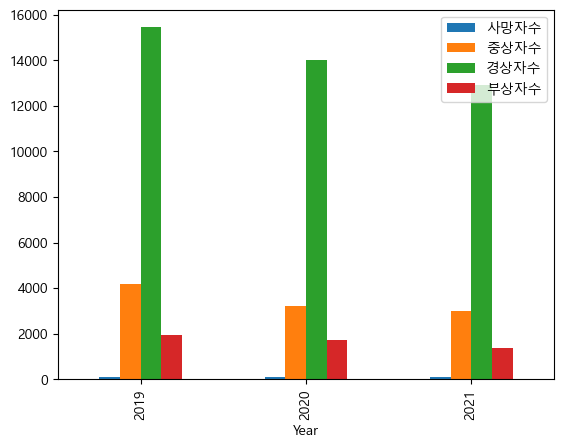

In [59]:
# 한글 깨짐
plt.rcParams['font.family'] = 'Malgun Gothic'

# Year 기준 전체적으로 줄어가는 추세
# Month, Day, 요일은 큰 의미없음
train.groupby("Year").sum()[["사망자수","중상자수","경상자수","부상자수"]].plot(kind = "bar")

<AxesSubplot:xlabel='기상상태'>

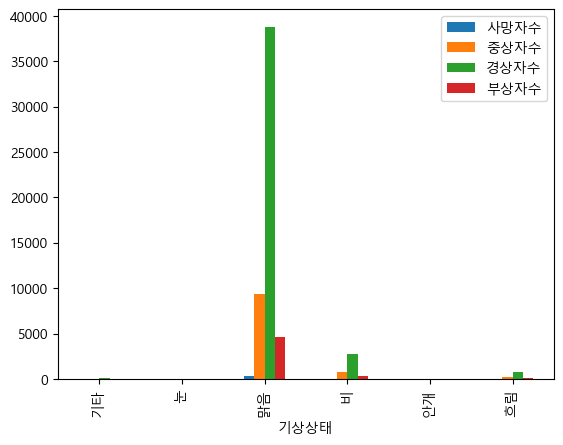

In [70]:
# 맑은 날이 많아서인지 맑은 날 가장 사고가 많음
train.groupby("기상상태").sum()[["사망자수","중상자수","경상자수","부상자수"]].plot(kind = "bar")

In [74]:
train.groupby("도로형태").sum()

,사망자수,중상자수,경상자수,부상자수,ECLO
도로형태,,,,,
교차로 - 교차로부근,28,1376,6670,773,27943
교차로 - 교차로안,66,2933,11036,1283,49716
교차로 - 교차로횡단보도내,18,585,945,137,6077
기타 - 기타,9,444,1850,215,8075
단일로 - 고가도로위,2,24,207,14,775
단일로 - 교량,3,48,305,24,1209
단일로 - 기타,178,4849,20719,2501,90683
단일로 - 지하차도(도로)내,1,81,320,39,1414
단일로 - 터널,3,16,102,5,421
